# **Machine Learning - Classification**
### I Presentation of the problem 

###  **Lending club : loan defaulters prediction**

###### Lending Club is a lending platform that lends money to people in need at an interest rate based on their credit history and other factors.
###### will use Machine learning  to predict whether the loan holder will pay back the loan or not, with help of several algorithms and based on the result obtained we can help the company predict the repayment of the loan or to considere the loan as a loss

## **II Presenting the different ML approaches and algorithms**

### A-The approches

* understanding and identifying data
* data preparation
* determine the model's features and train the model
* Evaluation
* deployment

### B- Algorithms

* Logistic Regression
* Linear Discriminant Analysis
* Decision Tree
* K-Nearest Neighbors Classifier
* Support Vector Machine
* Random Forest
* Bagging
* Extra Trees
* AdaBoost
* Gradient Boosting

## III Data Overview

#### III-A- Load libraries

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.reset_option('all')
df = pd.read_csv('lending-club-loan-data-2007-11-QueryResult.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
2,1070078,1305201.0,6500.0,6500.0,6500.0,60 months,0.1465,153.45,C,C3,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
3,1068509,1302907.0,6200.0,6200.0,6200.0,36 months,0.0991,199.80,B,B1,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
4,1057330,1288893.0,14000.0,14000.0,14000.0,36 months,0.1427,480.33,C,C2,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN


In [6]:
print('Number of rows   :',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows   : 42538
Number of columns: 115


#### III-B Data Description

In [7]:
df['delinq_amnt'].value_counts()

0.0       42504
27.0          1
6053.0        1
Name: delinq_amnt, dtype: int64

In [8]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,...,0.0,0.0,0.0,0.0,0.0,41170.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,0.121650,322.623063,6.913656e+04,13.373043,0.152449,713.052545,...,NaN,NaN,NaN,NaN,NaN,0.045227,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,0.037079,208.927216,6.409635e+04,6.726315,0.512406,36.188439,...,NaN,NaN,NaN,NaN,NaN,0.208737,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,0.054200,15.670000,1.896000e+03,0.000000,0.000000,610.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,0.096300,165.520000,4.000000e+04,8.200000,0.000000,685.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,0.119900,277.690000,5.900000e+04,13.470000,0.000000,710.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,0.147200,428.180000,8.250000e+04,18.680000,0.000000,740.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,...,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


## **IV Exploratroy Data Analysis** 

#### IV-A Type of Variables

In [9]:
pd.set_option('display.max_rows', None)
df.dtypes

id                                 object
member_id                         float64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

#### I notice  that the most variables are  of type float and object, in the preporcessing step moste of them will be encoded to be readable for ml algorithms

#### **IV-B Specification of Target Variable**

In [10]:
df['loan_status'].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='count', ylabel='loan_status'>

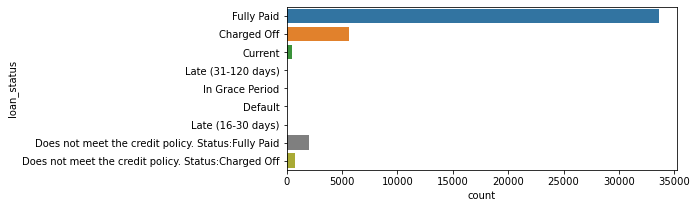

In [11]:
x = plt.subplots(figsize=(7, 3))
sns.countplot(y="loan_status", data=df)

* we can see that fully paid is the dominant value so it will be necessary to balance the data in modeling step 
* fully paid will be grouped in one variable the charged off also will be grouped in one variable

#### **IV-C Plot Indipendent Variables**

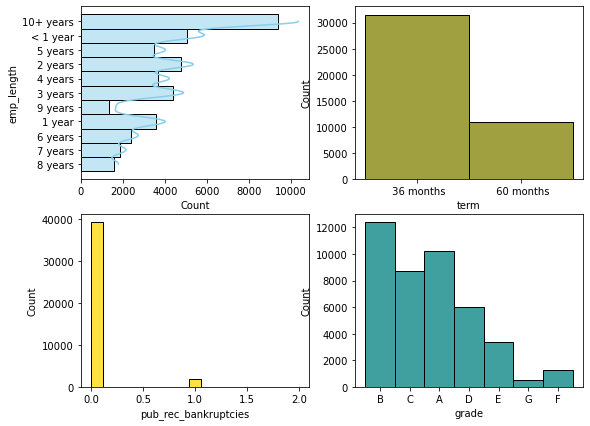

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(9, 7))
sns.histplot(data=df, y="emp_length", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="term", color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="pub_rec_bankruptcies", color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="grade", color="teal", ax=axs[1, 1])
plt.show()

* emp_length: the variable values are varied from 0 year experience to 10 years experience so it will be encoded in preprocessing step**
* pub_rec_bankruptcy:This variable varies from 0 to 1 and we clearly see that there some who file bankruptcy recoreds**
* Terme :The loan is remburse after 36 months or 60 months we have two values so its= will be label encoded in the preprocessing step so the model wil recongnise the values**
* Grade : eache category of borrowers are assigned to a grade with clearly the B and A are the most important also this variable will be label encoded to be model readable**

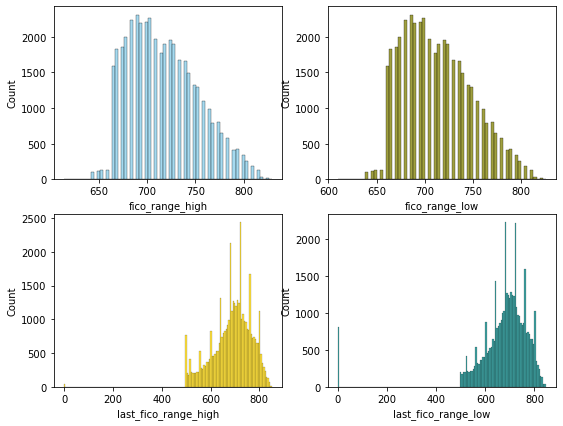

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(9, 7))
sns.histplot(data=df, x="fico_range_high", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="fico_range_low", color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="last_fico_range_high", color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="last_fico_range_low", color="teal", ax=axs[1, 1])
plt.show()

In [14]:
print(np.max(df['fico_range_high'] - df['fico_range_low']))
print(np.min(df['fico_range_high'] - df['fico_range_low']))

4.0
4.0


In [15]:
np.sum(df['fico_range_high'] - df['fico_range_low'])/42538

3.9997178992900464

In [16]:
np.sum(df['fico_range_high'] - df['fico_range_low'])

170140.0

In [17]:
print(np.min(df['last_fico_range_high'] - df['last_fico_range_low']))
print(np.max(df['last_fico_range_high'] - df['last_fico_range_low']))

0.0
499.0


In [18]:
np.sum(df['last_fico_range_high'] - df['last_fico_range_low'])/42538

12.921646527810429

In [19]:
np.sum(df['last_fico_range_high'] - df['last_fico_range_low'])

549661.0

* fico_range columns dosnt have much difference they are pretty much linear I will generate a new column out of the two that generate the mean
* late_fico_range also we have a slight difference between two variables for the sake of the model will remove both of them I will  work on that in the preprocessing step in details

#### ploting the loan status vs the Grade

<AxesSubplot:xlabel='grade', ylabel='count'>

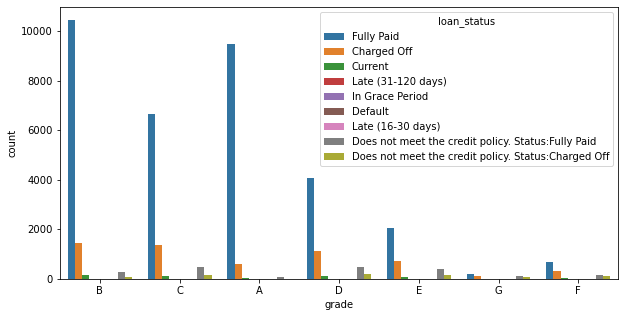

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='grade', data=df, hue='loan_status')

##### the ones with grade B C AND A clearly they have high probability of repaying the loan unlike the remaining gardes

#### ploting the installment vs loan amount

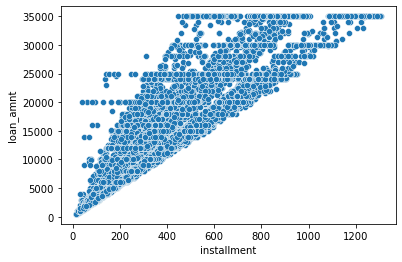

In [21]:
sns.scatterplot(x ="installment", y ="loan_amnt",data = df);

#### we can see that the loan is clearly being paiedby the ones who have high installement

## **Data Preprocessing**

### **Data Cleaning**

#### **Calculating how much missing data we have per variable**

#### **I define a function that will help me every time I clean the data and see the progress of null values treatment**

In [22]:
pd.set_option('display.max_rows', 120)
def nul_calcul(df):
    null_df=pd.DataFrame()
    null_df['Features']=df.isnull().sum().index
    null_df['Null values']=df.isnull().sum().values
    null_df['% Null values']=(df.isnull().sum().values / df.shape[0])*100
    return null_df.sort_values(by='% Null values',ascending=False)
nul_calcul(df)

,Features,Null values,% Null values
57,annual_inc_joint,42538,100.000000
86,mo_sin_rcnt_rev_tl_op,42538,100.000000
84,mo_sin_old_il_acct,42538,100.000000
81,bc_util,42538,100.000000
80,bc_open_to_buy,42538,100.000000
79,avg_cur_bal,42538,100.000000
78,acc_open_past_24mths,42538,100.000000
77,inq_last_12m,42538,100.000000
76,total_cu_tl,42538,100.000000
75,inq_fi,42538,100.000000


<AxesSubplot:>

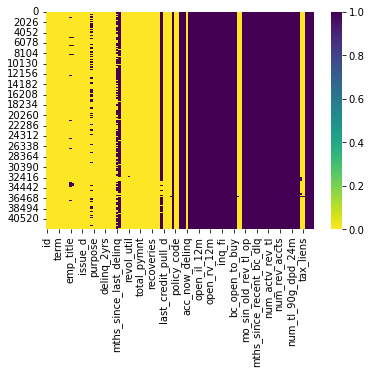

In [23]:
sns.heatmap(df.isnull(),cmap="viridis_r")

#### **Elimination of Variables with 100% Missing Values**

In [24]:
fnulls= (df.isnull().sum().values / df.shape[0])*100
dft= df.dropna( axis=1, thresh=fnulls)

In [25]:
dft.shape

(42538, 61)

<AxesSubplot:>

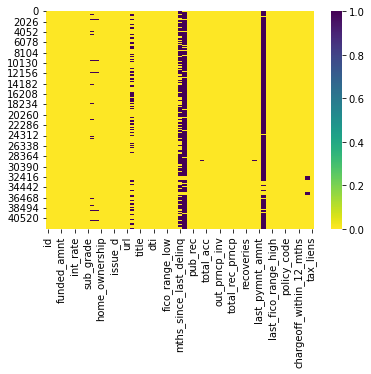

In [26]:
sns.heatmap(dft.isnull(),cmap="viridis_r")

In [27]:
nul_calcul(dft)

,Features,Null values,% Null values
49,next_pymnt_d,39242,92.251634
31,mths_since_last_record,38887,91.417086
30,mths_since_last_delinq,26929,63.305750
19,desc,13296,31.256759
10,emp_title,2629,6.180356
59,pub_rec_bankruptcies,1368,3.215948
11,emp_length,1115,2.621186
57,chargeoff_within_12_mths,148,0.347924
53,collections_12_mths_ex_med,148,0.347924
60,tax_liens,108,0.253891


#### **Tha leaves us with 61 variables from 115  that means  54 variables are deleted**

### Importing Dictionnary of variables for better understanding 

#### loading just non null variables from dft 

In [28]:
dft.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_n

In [29]:
dsf=pd.set_option('display.max_colwidth', None)
dsf = pd.read_csv('LCDataDictionary.csv',sep=',')
dsf.set_index("LoanStatNew", inplace=True)
dfd=dsf.loc[['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens']]

#### loading the dictionnary partially in a df called dsf with non null columns

In [30]:
#studying Variables and their usefulness for the model
dfd[:18]

,Description
LoanStatNew,
id,A unique LC assigned ID for the loan listing.
member_id,A unique LC assigned Id for the borrower member.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade


* id : for the sake of the model and their prediction usualy we wont have an ID or memeber_id 
* sub_grade : has   info thats already been in garde and  redundant variables removing ==> sub_Grade 
* funded_amnt : we  its the same as loan amount no need to keep both
* funded_amnt_inv :its the same as loan amount no need to keep both
* sub_grade : we already have more information on grade no need to keep both
* emp_title — has 2629 null values
* issue_d: date variable I need to keep the columns to a minimum so I can deploy easily
* pymnt_plan no need to keep since all the values are false and 1 is true


In [31]:
df['home_ownership'].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

#### removing columns above

In [32]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv','sub_grade','emp_title','pymnt_plan','issue_d']
dft= dft.drop(drop_list,axis=1)

#### Second Group Of Columns

#### move on to the next 18 columns:

In [33]:
dfd[18:37]

,Description
LoanStatNew,
url,URL for the LC page with listing data.
desc,Loan description provided by the borrower
purpose,A category provided by the borrower for the loan request.
title,The loan title provided by the borrower
zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state,The state provided by the borrower in the loan application
dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
earliest_cr_line,The month the borrower's earliest reported credit line was opened


* url : categorical variale link not suitable to be encoded
* desc: 13296 missing values not usful needs alot of processing
* title : not helping too much categorical values not fitting to be encoded
* zip_code : not fitting to be in dataset since we are interested in likelihood of a borrower reimbursing his dept
* earliest_cr_line : date variable no need to keep it
* inq_last_6mths : 30 missing vaues
* addr_state :  the same logic apply for zip code1
* delinq_2yrs: almost all of the values are 0s
* mths_since_last_delinq : 26929 missing values
* mths_since_last_record : 38887 missing values
* open_acc:  30 missing values
* pub_rec : 30 missing vaues
* revol_bal:the info already in revol_util no need to keep both

#### removing columns above

In [34]:
drop_list2 = ['url','desc','title','zip_code','earliest_cr_line','inq_last_6mths','addr_state','delinq_2yrs'
              ,'mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal']
dft= dft.drop(drop_list2,axis=1)

#### Third Group Of Columns

#### move on to the rest of the columns:

In [35]:
dfd[37:]

,Description
LoanStatNew,
initial_list_status,"The initial listing status of the loan. Possible values are – W, F"
out_prncp,Remaining outstanding principal for total amount funded
out_prncp_inv,Remaining outstanding principal for portion of total amount funded by investors
total_pymnt,Payments received to date for total amount funded
total_pymnt_inv,Payments received to date for portion of total amount funded by investors
total_rec_prncp,Principal received to date
total_rec_int,Interest received to date
total_rec_late_fee,Late fees received to date
recoveries,post charge off gross recovery


* initial_list_status : has one value == false
* out_prncp : we only need loan amounrt and the monthly instalment
* out_prncp_inv: we only need loan amounrt and the monthly instalment
* total_pymnt_inv:we only need loan amounrt and the monthly instalment
* total_rec_prncp: we have the instalment column
* total_rec_int: keeping the varibales to a minimum
* total_rec_late_fee:keeping the varibales to a minimum
* home_ownership: date variable no need to keep it
* collection_recovery_fee we already have recoveries column
* next_pymnt_d : not usful for the model prediction  39242 missing value
* last_pymnt_amnt : we can keep recoveries no need for last payement
* last_credit_pull_d: date variable no need to keep it
* last_credit_pull_d : date variable no need to keep it
* collections_12_mths_ex_med : Number of collections in 12 months excluding medical collections with 148 missing values plus all false
* application_type : hase one value of individual
* policy_code : not helping in prediction
* acc_now_delinq :we have delinq_2yrs columns
* chargeoff_within_12_mths : Number of charge-offs within 12 months 148 missing values 
* delinq_amnt : all values equal 0 no need to keep it
* pub_rec_bankruptcies : 	Number of public record bankruptcies with 1368 missing data plus all data are fals
* tax_liens : too muche false value the same value is repeated no need to keep it

#### removing columns above

In [36]:
drop_cols3 = ['initial_list_status','out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_prncp'
              ,'total_rec_int','total_rec_late_fee','collection_recovery_fee','last_credit_pull_d','last_pymnt_d',
              'next_pymnt_d','last_pymnt_amnt','collections_12_mths_ex_med','application_type','policy_code'
              ,'chargeoff_within_12_mths','acc_now_delinq','delinq_amnt','pub_rec_bankruptcies','tax_liens']
dft = dft.drop(drop_cols3, axis=1)

In [37]:
dft.shape

(42538, 20)

In [38]:
nul_calcul(dft)

,Features,Null values,% Null values
5,emp_length,1115,2.621186
14,revol_util,93,0.218628
15,total_acc,32,0.075227
7,annual_inc,7,0.016456
0,loan_amnt,3,0.007053
11,dti,3,0.007053
18,last_fico_range_high,3,0.007053
17,recoveries,3,0.007053
16,total_pymnt,3,0.007053
13,fico_range_high,3,0.007053


In [39]:
pd.set_option('display.max_rows', None)
emp_length_null=dft[dft['emp_length'].isnull()]
emp_length_null[['emp_length', 'loan_status']].value_counts('loan_status')

loan_status
Fully Paid                                             827
Charged Off                                            230
Current                                                 19
Does not meet the credit policy. Status:Fully Paid      19
Does not meet the credit policy. Status:Charged Off     15
In Grace Period                                          1
Late (16-30 days)                                        1
dtype: int64

#### removing null rows of the column emp_length

In [40]:
dft.dropna(subset=['emp_length'], how='all', inplace=True)

In [41]:
dft['emp_length'].value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

#### filling null vlues of the revol_util  with the mean

In [42]:
revol_mean=dft['revol_util'].mean()
dft['revol_util']=dft['revol_util'].fillna(revol_mean)

In [43]:
nul_calcul(dft)

,Features,Null values,% Null values
15,total_acc,29,0.070009
7,annual_inc,4,0.009656
0,loan_amnt,0,0.000000
11,dti,0,0.000000
18,last_fico_range_high,0,0.000000
17,recoveries,0,0.000000
16,total_pymnt,0,0.000000
14,revol_util,0,0.000000
13,fico_range_high,0,0.000000
12,fico_range_low,0,0.000000


#### **This method fills each missing row with the value of the nearest one above it**

In [44]:
dft.fillna(method='ffill', inplace=True)

In [45]:
nul_calcul(dft)

,Features,Null values,% Null values
0,loan_amnt,0,0.0
1,term,0,0.0
18,last_fico_range_high,0,0.0
17,recoveries,0,0.0
16,total_pymnt,0,0.0
15,total_acc,0,0.0
14,revol_util,0,0.0
13,fico_range_high,0,0.0
12,fico_range_low,0,0.0
11,dti,0,0.0


<AxesSubplot:>

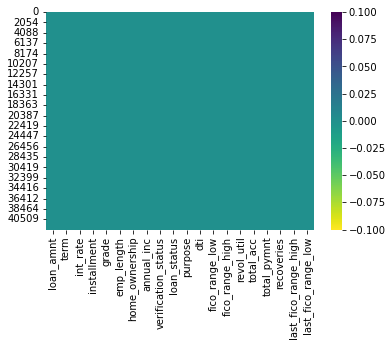

In [46]:
sns.heatmap(dft.isnull(),cmap="viridis_r")

In [47]:
dft = dft.dropna(how='all')

#### it seems now that we have data frame withou null values

In [48]:
dft.shape

(41423, 20)

In [49]:
#Shape of dataframe
print('Number of rows   :',dft.shape[0])
print('Number of columns:',dft.shape[1])

Number of rows   : 41423
Number of columns: 20


## **Features Engineering**

#### **The variable verification status has 3 values 'verified', 'source verified', and 'not verified' source verified and verified mean the same thing so I transform 'source verified' to verified and proceed to label encoding**

In [50]:
dft["verification_status"].value_counts()

Not Verified       18313
Verified           13004
Source Verified    10106
Name: verification_status, dtype: int64

In [51]:
dft["verification_status"].replace({"Source Verified":'Verified'}, inplace=True)

In [52]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_enc_vs = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
dft['verification_status']= label_enc_vs.fit_transform(dft['verification_status'])
  
dft['verification_status'].unique()

array([1, 0])

#### **The variable home_ownership has alot of values and possibly good for prediction so it'll be wise to encode it

In [53]:
# Encode labels in column 'species'.
dft['home_ownership']= label_enc_vs.fit_transform(dft['home_ownership'])
  
dft['home_ownership'].unique()

array([4, 3, 0, 2, 1])

#### **The variable emp_length has 11 values I have encoded it ordinaly by experience**

In [54]:
dft["emp_length"].value_counts()

10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
9 years      1341
Name: emp_length, dtype: int64

In [55]:
dft["emp_length"].replace({"< 1 year":0 ,"1 year":1,"2 years":2,"3 years":3,"4 years":4,"5 years":5,
                          "6 years":6,"7 years":7,"8 years":8,"9 years":9,"10+ years":10}, inplace=True)
dft['emp_length'].unique()

array([10,  0,  5,  2,  4,  3,  9,  1,  6,  7,  8], dtype=int64)

#### **checking the correlation between 'fico_range_high' and 'fico_range_low' 

<AxesSubplot:xlabel='fico_range_low', ylabel='fico_range_high'>

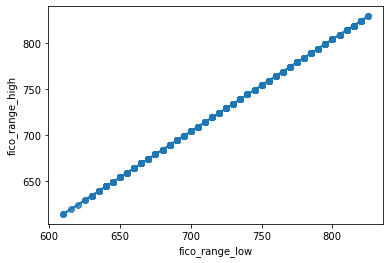

In [56]:
sns.regplot(x=dft["fico_range_low"], y=dft["fico_range_high"])

#### we can see clearly that the two variables are linear no need to keep both of them, will generate mean columns out of them

#### calculating the mean of the two variables and drop them afterwards

In [57]:
dft['fico_score']=dft[['fico_range_low', 'fico_range_high']].mean(axis=1)

In [58]:
dft=dft.drop(['fico_range_low','fico_range_high'],axis=1)

#### **checking the correlation between tast_fico_range_low and last_fico_range_high**

In [59]:
dft[["last_fico_range_high","last_fico_range_low"]].corr()

,last_fico_range_high,last_fico_range_low
last_fico_range_high,1.000000,0.851592
last_fico_range_low,0.851592,1.000000


<AxesSubplot:xlabel='last_fico_range_high', ylabel='last_fico_range_low'>

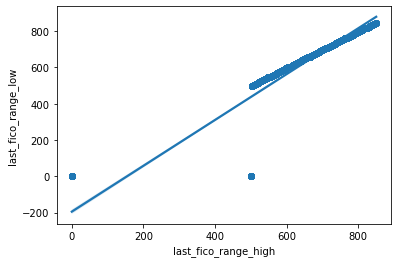

In [60]:
sns.regplot(x=dft["last_fico_range_high"], y=dft["last_fico_range_low"])

In [61]:
dft=dft.drop(['last_fico_range_high','last_fico_range_low'],axis=1)

#### since we already have a fico score column no need to keep the late score,I ll remove both of them

#### **The variable sub_Grade takes an ordinal shape from A to G the ordinal encoding is fitting in this case**

In [62]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
dft['grade']= label_encoder.fit_transform(dft['grade'])
  
dft['grade'].unique()

array([1, 2, 0, 3, 4, 6, 5])

#### **The purpose variable has alot of values I took the unique variables and split them into to 2 categories personal and investment so that in encoding dont give us alot variable**

In [63]:
dft["purpose"].replace({"debt_consolidation":"personal" ,"credit_card":"personal","other":"personal",
                        "home_improvement":"investement","major_purchase":"investement","small_business":"investement",
                          "car":"investement","wedding":"personal","medical":"personal","moving":"investement","house":"investement","educational":"investement",
                       "vacation":"investement","vacation":"investement","renewable_energy":"investement"}, inplace=True)

In [64]:
dft['purpose']= label_encoder.fit_transform(dft['purpose'])
  
dft['purpose'].unique()

array([1, 0])

#### Replace the two terms with their corresponding number for the sake of model understanding

In [65]:
dft["term"].replace({" 36 months":36 ," 60 months":60}, inplace=True)
dft['term'].unique()

array([36, 60], dtype=int64)

In [66]:
dft['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)',
       'In Grace Period', 'Default', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

#### I replace other values like 'current' and 'Does Not.... Status:Fully Paid' with Fully Paid and Late values with charged of so we can have a two class problem of classification

In [67]:
dft["loan_status"].replace({"Default":"Fully Paid" ,"Current":"Fully Paid","In Grace Period":"Fully Paid",
                     "Late (16-30 days)":"Charged Off","Does not meet the credit policy. Status:Fully Paid":"Fully Paid",
                    "Does not meet the credit policy. Status:Charged Off":"Charged Off",
                           "Late (31-120 days)":"Charged Off"}, inplace=True)
dft['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [68]:
dft['loan_status']= label_encoder.fit_transform(dft['loan_status'])
dft['loan_status'].unique()

array([1, 0])

In [69]:
pd.set_option('display.max_columns', None)
dft.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,revol_util,total_acc,total_pymnt,recoveries,fico_score
0,5000.0,36,0.1065,162.87,1,10,4,24000.0,1,1,1,27.65,0.837,9.0,5863.155187,0.00,737.0
1,2500.0,60,0.1527,59.83,2,0,4,30000.0,1,0,0,1.00,0.094,4.0,1008.710000,117.08,742.0
2,6500.0,60,0.1465,153.45,2,5,3,72000.0,0,1,1,16.12,0.206,23.0,7678.017673,0.00,697.0
3,6200.0,36,0.0991,199.80,1,2,4,25000.0,0,0,1,20.64,0.477,12.0,2452.220000,258.27,712.0
4,14000.0,36,0.1427,480.33,2,0,4,35000.0,1,1,1,8.40,0.657,30.0,16745.801430,0.00,682.0


In [70]:
dft.shape

(41423, 17)

In [71]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41423 entries, 0 to 42537
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            41423 non-null  float64
 1   term                 41423 non-null  int64  
 2   int_rate             41423 non-null  float64
 3   installment          41423 non-null  float64
 4   grade                41423 non-null  int32  
 5   emp_length           41423 non-null  int64  
 6   home_ownership       41423 non-null  int32  
 7   annual_inc           41423 non-null  float64
 8   verification_status  41423 non-null  int32  
 9   loan_status          41423 non-null  int32  
 10  purpose              41423 non-null  int32  
 11  dti                  41423 non-null  float64
 12  revol_util           41423 non-null  float64
 13  total_acc            41423 non-null  float64
 14  total_pymnt          41423 non-null  float64
 15  recoveries           41423 non-null 

In [72]:
nul_calcul(dft)

,Features,Null values,% Null values
0,loan_amnt,0,0.0
9,loan_status,0,0.0
15,recoveries,0,0.0
14,total_pymnt,0,0.0
13,total_acc,0,0.0
12,revol_util,0,0.0
11,dti,0,0.0
10,purpose,0,0.0
8,verification_status,0,0.0
1,term,0,0.0


## **Splitting Dataset Into Train and Test**

### **1- Define X & y**

In [144]:
X=dft.drop('loan_status',axis=1)
y=dft['loan_status']

In [145]:
#show the shape of X and y
X.shape,y.shape

((41423, 16), (41423,))

In [146]:
#show the head of X
X.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,revol_util,total_acc,total_pymnt,recoveries,fico_score
0,5000.0,36,0.1065,162.87,1,10,4,24000.0,1,1,27.65,0.837,9.0,5863.155187,0.00,737.0
1,2500.0,60,0.1527,59.83,2,0,4,30000.0,1,0,1.00,0.094,4.0,1008.710000,117.08,742.0
2,6500.0,60,0.1465,153.45,2,5,3,72000.0,0,1,16.12,0.206,23.0,7678.017673,0.00,697.0
3,6200.0,36,0.0991,199.80,1,2,4,25000.0,0,1,20.64,0.477,12.0,2452.220000,258.27,712.0
4,14000.0,36,0.1427,480.33,2,0,4,35000.0,1,1,8.40,0.657,30.0,16745.801430,0.00,682.0


In [147]:
# split the data between the train and test dataset (test_size=0.3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1)

In [148]:
print("size of dataset", dft.shape,dft.shape)
print("size of training dataset", X_train.shape,y_train.shape)
print("size of test dataset", X_test.shape,y_test.shape)

size of dataset (41423, 17) (41423, 17)
size of training dataset (28996, 16) (28996,)
size of test dataset (12427, 16) (12427,)


### Scalling data so we can have the same scale so the model doesn't favorit one feature over the other

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [152]:
scaler=MinMaxScaler()

In [153]:
scaler.fit(X_train)

MinMaxScaler()

In [154]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

### Balancing Data

#### It seems we have unbalanced data w'ill have to balance it

<AxesSubplot:ylabel='loan_status'>

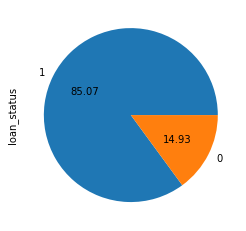

In [155]:
y.value_counts().plot.pie(autopct='%.2f')

In [156]:
#!pip install imblearn

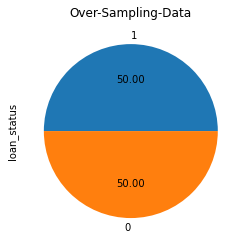

In [157]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(sampling_strategy=1)
X_res, y_res=ros.fit_resample(X_train,y_train)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Over-Sampling-Data")

## **Building Models**

### **Running Models and Evaluating with graphs and indicators**

#### **Load Classification Models**

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score ,confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

### **Logistic Regression**

In [159]:
LR = LogisticRegression().fit(X_res,y_res)
LR

LogisticRegression()

[[ 1619   228]
 [  397 10183]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1847
           1       0.98      0.96      0.97     10580

    accuracy                           0.95     12427
   macro avg       0.89      0.92      0.90     12427
weighted avg       0.95      0.95      0.95     12427



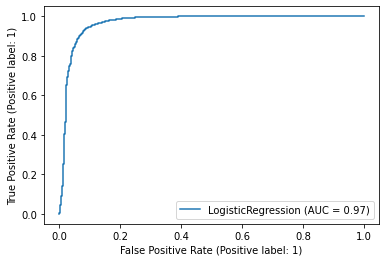

In [160]:
y_pred=LR.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_roc_curve(LR,X_test,y_test)

### **Linear Discriminant Analysis**

In [161]:
LDA = LinearDiscriminantAnalysis().fit(X_res,y_res)
LDA

LinearDiscriminantAnalysis()

[[ 1464   383]
 [  412 10168]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      1847
           1       0.96      0.96      0.96     10580

    accuracy                           0.94     12427
   macro avg       0.87      0.88      0.87     12427
weighted avg       0.94      0.94      0.94     12427



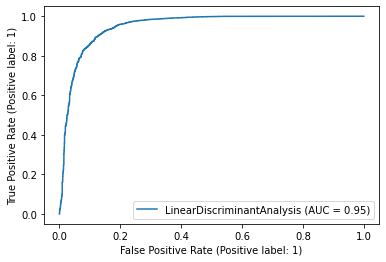

In [162]:
y_pred=LDA.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_roc_curve(LDA,X_test,y_test)

### **Decision Tree**

In [163]:
DT = DecisionTreeClassifier().fit(X_res,y_res)
DT

DecisionTreeClassifier()

[[ 1785    62]
 [   41 10539]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1847
           1       0.99      1.00      1.00     10580

    accuracy                           0.99     12427
   macro avg       0.99      0.98      0.98     12427
weighted avg       0.99      0.99      0.99     12427



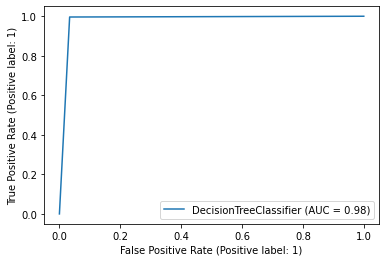

In [164]:
y_pred=DT.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_roc_curve(DT,X_test,y_test)

### **K-Nearest Neighbors Classifier**

In [165]:
KNN = KNeighborsClassifier().fit(X_res,y_res)
KNN

KNeighborsClassifier()

[[1024  823]
 [2200 8380]]
              precision    recall  f1-score   support

           0       0.32      0.55      0.40      1847
           1       0.91      0.79      0.85     10580

    accuracy                           0.76     12427
   macro avg       0.61      0.67      0.63     12427
weighted avg       0.82      0.76      0.78     12427



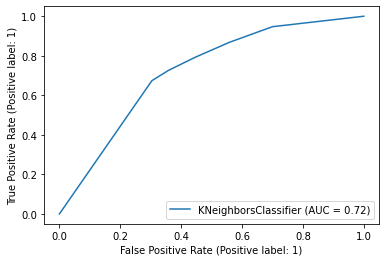

In [166]:
y_pred=KNN.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_roc_curve(KNN,X_test,y_test)

### **Support Vector Machine**

In [167]:
SVM = SVC().fit(X_res,y_res)
SVM

SVC()

[[ 1632   215]
 [  191 10389]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1847
           1       0.98      0.98      0.98     10580

    accuracy                           0.97     12427
   macro avg       0.94      0.93      0.94     12427
weighted avg       0.97      0.97      0.97     12427



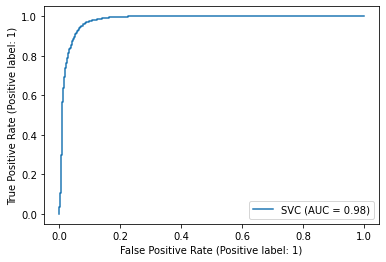

In [168]:
y_pred=SVM.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_roc_curve(SVM,X_test,y_test)

### **Random Forest**

In [169]:
RF=RandomForestClassifier().fit(X_res,y_res)
RF

RandomForestClassifier()

[[ 1752    95]
 [    0 10580]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1847
           1       0.99      1.00      1.00     10580

    accuracy                           0.99     12427
   macro avg       1.00      0.97      0.98     12427
weighted avg       0.99      0.99      0.99     12427



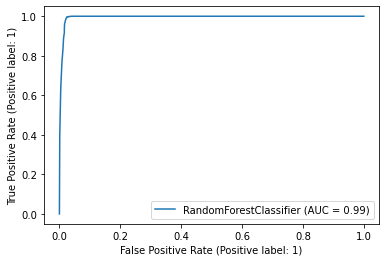

In [170]:
y_pred=RF.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_roc_curve(RF,X_test,y_test)

### **Bagging**

In [171]:
BG=BaggingClassifier().fit(X_res,y_res)
BG

BaggingClassifier()

[[ 1793    54]
 [   25 10555]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1847
           1       0.99      1.00      1.00     10580

    accuracy                           0.99     12427
   macro avg       0.99      0.98      0.99     12427
weighted avg       0.99      0.99      0.99     12427



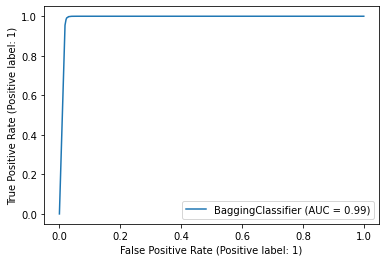

In [172]:
y_pred=BG.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_roc_curve(BG,X_test,y_test)

### **Extra Trees**

In [173]:
ET=ExtraTreesClassifier().fit(X_res,y_res)
ET

ExtraTreesClassifier()

[[ 1627   220]
 [    1 10579]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1847
           1       0.98      1.00      0.99     10580

    accuracy                           0.98     12427
   macro avg       0.99      0.94      0.96     12427
weighted avg       0.98      0.98      0.98     12427



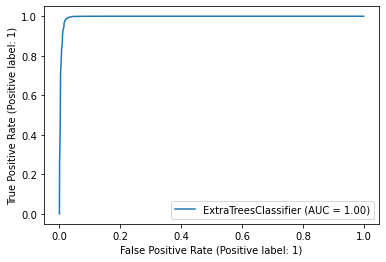

In [174]:
y_pred=ET.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_roc_curve(ET,X_test,y_test)

### **AdaBoost**

In [175]:
AB = AdaBoostClassifier().fit(X_res,y_res)
AB

AdaBoostClassifier()

[[ 1760    87]
 [   25 10555]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1847
           1       0.99      1.00      0.99     10580

    accuracy                           0.99     12427
   macro avg       0.99      0.98      0.98     12427
weighted avg       0.99      0.99      0.99     12427



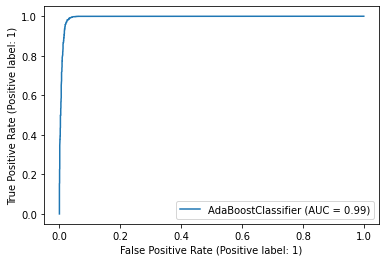

In [176]:
y_pred=AB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_roc_curve(AB,X_test,y_test)

### **Gradient Boosting**

In [177]:
GB = GradientBoostingClassifier().fit(X_res,y_res)
GB

GradientBoostingClassifier()

[[ 1769    78]
 [    7 10573]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1847
           1       0.99      1.00      1.00     10580

    accuracy                           0.99     12427
   macro avg       0.99      0.98      0.99     12427
weighted avg       0.99      0.99      0.99     12427



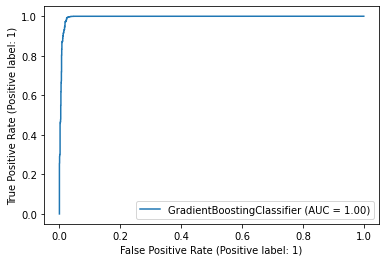

In [178]:
y_pred=GB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
plot_roc_curve(GB,X_test,y_test)

### **Overview Of the models**

In [179]:
#set name for each model
models =[('LReg',LogisticRegression()),
         ('LDA',LinearDiscriminantAnalysis()),
         ('DT',DecisionTreeClassifier(random_state=1)),
         ('KNN',KNeighborsClassifier()),
         ('SVM',SVC()),
         ('RF',RandomForestClassifier(random_state=1)),
         ('BR',BaggingClassifier(random_state=1)),
         ('ExtraT',ExtraTreesClassifier(random_state=1)),
         ('Adabst',AdaBoostClassifier(random_state=1)),
         ('GBM',GradientBoostingClassifier(random_state=1))
        ]

In [180]:
#fit the models and evaluate them according classification metrics
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score
lacc,lf1,lauc=[],[],[]
names=[]
for name,model in models:
    model.fit(X_res,y_res)
    y_pred=model.predict(X_test)
    acc=round(accuracy_score(y_test,y_pred),2)
    lacc.append(acc)
    f1=round(f1_score(y_test,y_pred),2)
    lf1.append(f1)
    aucb=round(roc_auc_score(y_test,y_pred),2)
    lauc.append(aucb)
    names.append(name)

In [181]:
#show the metrics for each model
dm=pd.DataFrame(index=names)
dm['Accuracy']=lacc
dm['F1-score']=lf1
dm['AUC']=lauc
dm

,Accuracy,F1-score,AUC
LReg,0.95,0.97,0.92
LDA,0.94,0.96,0.88
DT,0.99,0.99,0.98
KNN,0.76,0.85,0.67
SVM,0.97,0.98,0.93
RF,0.99,1.00,0.98
BR,0.99,1.00,0.99
ExtraT,0.98,0.99,0.94
Adabst,0.99,0.99,0.98
GBM,0.99,1.00,0.98


## **Tuning Of Top 3 Models**

#### DecisionTreeClassifier
#### BaggingClassifier
#### GradientBoostingClassifier

### **Implementation of GridSearchCV**

#### The gridSearchCV() function will be used to preform an exhaustive search of the optimal parameter 

In [182]:
from sklearn.model_selection import GridSearchCV

# setup of the basic model (default model)

RF=RandomForestClassifier(random_state=1)
RF.fit(X_res,y_res)
y_pred=RF.predict(X_test)

In [183]:
def model_report(model):
    plot_confusion_matrix(model,X_test,y_test)
    print(classification_report(y_test,model.predict(X_test)))
    print("Training accuracy: ",RF.score(X_res,y_res))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1847
           1       0.99      1.00      1.00     10580

    accuracy                           0.99     12427
   macro avg       1.00      0.98      0.99     12427
weighted avg       0.99      0.99      0.99     12427

Training accuracy:  1.0


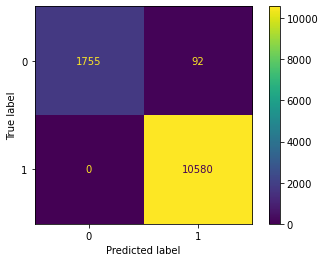

In [184]:
model_report(RF)

#### Observations & Conclusions:
###### We can see that the training accuracy of Decision Tree with default hyperparameters is 1 i.e. 100% accuracy. and when we fit the same model on testing data, the accuracy reduces to 99% approx. we'll proced to tunning to see if we can improve some accuracy prediction

### Hyperparameter Tuning

#### For Random Forest Classifier

In [185]:
print('Actual Parameters of the RF model :')
from pprint import pprint
pprint(RF.get_params())

Actual Parameters of the RF model :
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


##### Parameters to investigate
- max_depth
- max_features
- min_samples_split
- min_samples_leaf

In [113]:
#Setting values for the parameters
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyperT = dict(max_depth = max_depth, min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf, max_features=max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridRF = GridSearchCV(RF, hyperT, cv = 3, verbose = 1, n_jobs = -1)
bestRF = gridRF.fit(X_res,y_res)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


In [115]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',gridRF.best_params_)

The best hyper parameters are:
 {'max_depth': 25, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### Fitting Random Forest with best Hyper parameters

In [186]:
#Fitting the decision tree model with the best hyper parameters obtained through GridSearchCV
RF_HY = RandomForestClassifier(max_depth=25, min_samples_leaf=1,min_samples_split=2)
RF_HY.fit(X_res,y_res)
pred_RF_HY = RF_HY.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1847
           1       0.99      1.00      1.00     10580

    accuracy                           0.99     12427
   macro avg       1.00      0.97      0.98     12427
weighted avg       0.99      0.99      0.99     12427

Training accuracy:  1.0


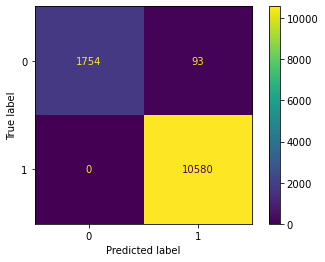

In [187]:
model_report(RF_HY)

#### For BaggingClassifier

In [190]:
# setup of the basic model (default model)
BG=BaggingClassifier()
BG.fit(X_res,y_res)
y_pred=BG.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1847
           1       0.99      1.00      1.00     10580

    accuracy                           0.99     12427
   macro avg       0.99      0.98      0.99     12427
weighted avg       0.99      0.99      0.99     12427

Training accuracy:  1.0


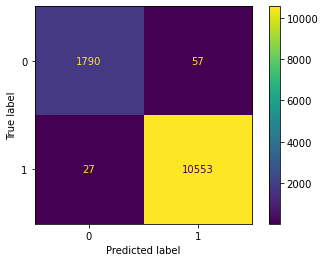

In [191]:
model_report(BG)

In [124]:
print('Actual Parameters of the a model :')
from pprint import pprint
pprint(BG.get_params())

Actual Parameters of the a model :
{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


##### Parameters to investigate
- n_estimators
- max_depth
- max_samples 
- max_features 

In [125]:
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
max_samples = [5, 10, 25, 50, 100]
max_features = [1, 2, 5, 10, 13]

#Creating a dictionary for the hyper parameters
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridbag = GridSearchCV(BG, hyperbag, cv = 3, verbose = 1, n_jobs = -1)
bestbag = gridbag.fit(X_res,y_res)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


In [126]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',gridbag.best_params_)

The best hyper parameters are:
 {'max_features': 10, 'max_samples': 100, 'n_estimators': 1200}


#### Fitting Bagging Classifier with hyper parameters

In [196]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
BG_HY = BaggingClassifier(max_features=10, max_samples=100,n_estimators= 1200)
BG_HY.fit(X_res,y_res)
pred_BG_HY = BG_HY.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1847
           1       0.98      1.00      0.99     10580

    accuracy                           0.98     12427
   macro avg       0.98      0.95      0.97     12427
weighted avg       0.98      0.98      0.98     12427

Training accuracy:  1.0


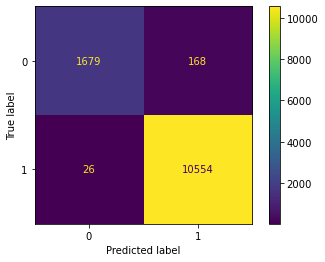

In [197]:
model_report(BG_HY)

#### For Gradient Boosting Classifier 

In [198]:
# setup of the basic model (default model)
GB=GradientBoostingClassifier()
GB.fit(X_res,y_res)
y_pred=GB.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1847
           1       0.99      1.00      1.00     10580

    accuracy                           0.99     12427
   macro avg       0.99      0.98      0.99     12427
weighted avg       0.99      0.99      0.99     12427

Training accuracy:  1.0


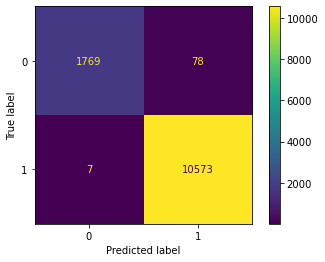

In [199]:
model_report(GB)

In [201]:
print('Actual Parameters of the a model :')
from pprint import pprint
pprint(GB.get_params())

Actual Parameters of the a model :
{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


#### Fitting Gradient Boosting Classifier with hyper parameters

In [202]:
learning_rate=[0.15,0.1,0.05,0.01,0.005]
n_estimators=[1, 2, 5, 10, 13,15,17,19]
max_features=[2,3,4,5,6,7,9,12]

#Creating a dictionary for the hyper parameters
hypergb = dict(n_estimators = n_estimators, learning_rate = learning_rate, 
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridgb = GridSearchCV(GB, hypergb, cv = 3, verbose = 1, n_jobs = -1)
bestgb = gridgb.fit(X_res,y_res)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


In [203]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',bestgb.best_params_)

The best hyper parameters are:
 {'learning_rate': 0.15, 'max_features': 12, 'n_estimators': 19}


In [204]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
GB_HY = GradientBoostingClassifier(max_features=12, learning_rate=0.15,n_estimators= 19)
GB_HY.fit(X_res,y_res)
pred_GBM_HY = GB_HY.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1847
           1       0.98      1.00      0.99     10580

    accuracy                           0.99     12427
   macro avg       0.99      0.95      0.97     12427
weighted avg       0.99      0.99      0.99     12427

Training accuracy:  1.0


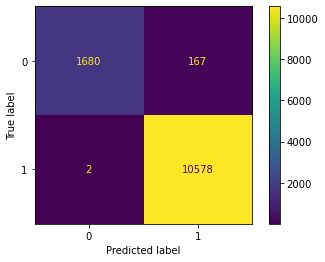

In [205]:
model_report(GB_HY)

### The model selected is Random Forest

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1847
           1       0.99      1.00      1.00     10580

    accuracy                           0.99     12427
   macro avg       1.00      0.97      0.98     12427
weighted avg       0.99      0.99      0.99     12427

Training accuracy:  1.0


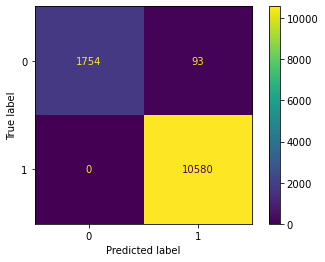

In [206]:
model_report(RF_HY)

#### The confusion matrix shows us that the model has been trained well to predict x test 
#### in 0 "charged off" section he miss 93 predicting them as fully paid
#### and 0 miss in fully paid section

###  Model saving

In [211]:
import pickle
filename = 'RF_HY.pkl'
pickle.dump(RF_HY, open(filename, 'wb'))

In [212]:
#to load a saved model
RF_HY = pickle.load(open("RF_HY.pkl", "rb"))

In [213]:
#the you can use the loaded model
RF_HY.predict(X_test)

array([1, 0, 1, ..., 1, 1, 0])

In [214]:
#the you can use the loaded model
RF_HY.predict_proba(X_test)

array([[0.  , 1.  ],
       [0.87, 0.13],
       [0.02, 0.98],
       ...,
       [0.  , 1.  ],
       [0.02, 0.98],
       [1.  , 0.  ]])